In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
import matplotlib.pyplot as plt


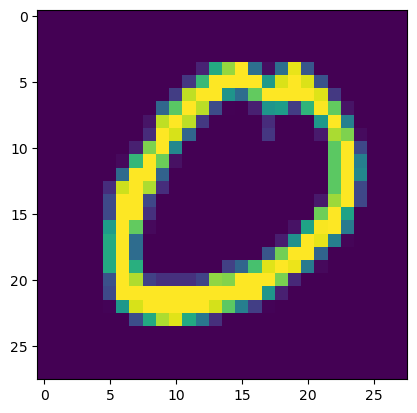

In [5]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
import time 
start = time.time()
y_pred =  knn.predict(X_test)
print(time.time()-start)

14.401417016983032


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## PCA 

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [16]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)


In [17]:
X_train.shape

(33600, 784)

In [18]:
knn = KNeighborsClassifier()

In [19]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test_trf)

In [21]:
accuracy_score(y_test,y_pred)

0.1363095238095238

In [22]:
## transforming to a 2D coordinate system

In [23]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [24]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

## pca in 3d

In [25]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [26]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [27]:
pca.explained_variance_
#Eigen values

array([692.55228737, 139.53877134,  41.34548258])

In [28]:
pca.components_.shape

(3, 784)

In [29]:
pca.explained_variance_ratio_

array([0.44085413, 0.08882541, 0.02631906])